# Renault car sequencing III -- hill climbing

Herkunft von Problem und Daten:
https://www.roadef.org/challenge/2005/en/

Wir importieren ein paar Pakete. (Nicht alle brauchen wir hier.) 
<ul>
    <li><code>numpy</code>: wissenschaftliche Bibliothek, im wesentlichen für die array-Klasse</li>
    <li><code>matplotlib</code>: Visualisierungsfunktionen</li>
    <li><code>math</code>: mathematische Funktionen</li>
</ul>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import random
import time

plt.style.use("seaborn")  ## plots sehen so ein bisschen schöner aus

Als nächstes werden die Instanzdaten gelesen und eine Bibliothek (<code>rnlt</code>, kurz für *Renault*) mit Hilfscode (data handling und Visualisierung) importiert. Weiterhin werden die Instanzdaten und <code>rnlt</code> automatisch heruntergeladen -- dies funktioniert so wie es dort steht unter Google Colab und unter Linux (evtl auch iOs). Wenn Sie den Code auf einem Windows-Rechner lokal ausführen wollen, dann laden Sie die Instanzdaten unter (https://www.roadef.org/challenge/2005/files/Instances_set_A.zip)(https://www.roadef.org/challenge/2005/files/Instances_set_A.zip) herunter, dann entpacken Sie die Daten und speichern Sie die Daten und <code>rnlt.py</code> im gleichen Ordner wie dieses juypter-Notebook. Weiterhin müssen Sie die ersten drei Zeilen auskommentieren.

In [2]:
!wget -q https://www.roadef.org/challenge/2005/files/Instances_set_A.zip
!unzip -q Instances_set_A.zip
!wget -q https://raw.githubusercontent.com/henningbruhn/mobp/main/sequencing_aufgabe/rnlt2.py
    
# Pfad zu den gespeicherten Instanzen -- ersetzen Sie das evtl durch den entsprechenden Pfad bei Ihnen
#path="RENAULT/Instances_set_A/"   
path="Instances/"

## rnlt2 enthält den greedy-Code
## wir nutzen aber als alias weiter rnlt 
import rnlt2 as rnlt 

Wir laden wieder alle Instanzen in das dictionary <code>data_dict</code> ein.

In [3]:
data_dict=rnlt.read_in_all_instances(path)

Folgende Instanzen wurden eingelesen: 
  039_38_4_EP_RAF_ch1
  024_38_3_EP_ENP_RAF
  048_39_1_EP_ENP_RAF
  025_38_1_EP_ENP_RAF
  064_38_2_EP_RAF_ENP_ch1
  064_38_2_RAF_EP_ENP_ch2
  022_3_4_EP_RAF_ENP
  048_39_1_EP_RAF_ENP
  024_38_5_EP_RAF_ENP
  039_38_4_RAF_EP_ch1
  024_38_3_EP_RAF_ENP
  025_38_1_EP_RAF_ENP
  064_38_2_EP_RAF_ENP_ch2
  064_38_2_RAF_EP_ENP_ch1
  022_3_4_RAF_EP_ENP
  024_38_5_EP_ENP_RAF


## 4. Aufgabe -- hill climbing

Hill climbing kann existierende Lösungen verbessern, in dem schrittweise kleine Änderungen vorgenommen werden. Wie könnte hier eine kleine Änderung aussehen? Unten finden Sie ein Gerüst für hill climbing. Implementieren Sie die Suche nach einem lokalen Schritt und vervollständigen Sie das Gerüst. Wenden Sie hill climbing auf die Instanzen an und vergleichen Sie mit den vorherigen Ergebnissen. Wenn Sie Zeit haben, experimentieren Sie mit dem Einstellparameter <code>tries</code> und beobachten Sie, wie sich dieser auf die Laufzeit auswirkt. 

Um hill climbing zu starten, benötigen wir bereits eine Reihung. Hier bieten sich zwei Optionen an: Wir starten mit einer zufälligen Reihung oder wir starten mit der greedy-Reihung. Vergleichen Sie!

In [4]:
sample_instance=data_dict['024_38_5_EP_RAF_ENP']
greedy_schedule=rnlt.greedy(sample_instance)
greedy_cost=rnlt.compute_objective(greedy_schedule,sample_instance)
print("Kosten der greedy-Lösung: {}".format(greedy_cost))

Kosten der greedy-Lösung: 303475494.0


Als kleine Hilfe habe ich Ihnen noch eine Klasse <code>Best_Tracker</code> geschrieben, die sich leicht die Lösung mit den niedrigsten Kosten merkt. Jedes Mal, wenn sich die Kosten geändert haben, rufen <code>tracker.update(solution,cost)</code> auf -- wenn die Kosten niedriger sind als bisher, werden sich die neuen Kosten und die neue Lösung gemerkt, und zwar in den Variablen <code>tracker.best</code> und <code>tracker.best_cost</code>. Hier ist ein kleines Beispiel zur Illustration.

In [5]:
tracker=rnlt.Best_Tracker()
for i in range(10):
    cost=random.randint(1,100)
    solution="Lösung Nr {}".format(i)
    tracker.update(solution,cost)
print("Beste Lösung: {} ** Kleinste Kosten: {}".format(tracker.best,tracker.best_cost))

Beste Lösung: Lösung Nr 9 ** Kleinste Kosten: 5


In [6]:
def tweak(schedule):
    n=len(schedule)
    first=random.randint(0,n-1)
    second=random.randint(0,n-1)
    swap(schedule,(first,second))
    return [first,second]

def swap(schedule,positions):
    first,second=positions
    schedule[first],schedule[second]=schedule[second],schedule[first]

def hill_climbing(schedule,instance,tries=20,record_cost=False):
    current_cost=rnlt.compute_objective(schedule,instance)
    cost_record=[current_cost]
    while True:
        step_tracker=rnlt.Best_Tracker()
        for _ in range(tries):
            ### Fügen Sie hier Ihren Code ein ###
            positions=tweak(schedule)
            cost=rnlt.compute_objective(schedule,instance)
            step_tracker.update(positions,cost)
            swap(schedule,positions)
            ### Ende Einfügung ###
        ## wenn keine Verbesserung gefunden, brich ab
        if step_tracker.best_cost>=current_cost:
            if record_cost:
                return schedule,current_cost,cost_record
            return schedule,current_cost
        ## wenn Verbesserung gefunden, führe diese aus
        ### Fügen Sie hier Ihren Code ein ###
        positions=step_tracker.best
        swap(schedule,positions)
        ### Ende Einfügung ###
        current_cost=step_tracker.best_cost
        if record_cost:
            cost_record.append(current_cost)
            
start=time.time()
new_schedule,cost,cost_record=hill_climbing(greedy_schedule.copy(),sample_instance,tries=50,record_cost=True)
end=time.time()
hill_cost=rnlt.compute_objective(new_schedule,sample_instance)
renault_schedule=sample_instance['renault_schedule']
renault_cost=rnlt.compute_objective(renault_schedule,sample_instance)
print("Kosten hill climbing: {}".format(hill_cost))
print("Kosten Renault      : {}".format(renault_cost))
print("Laufzeit hill climbing: {:.1f}s".format(end-start))

Kosten hill climbing: 284494495.0
Kosten Renault      : 96467092.0
Laufzeit hill climbing: 4.5s


Plotten Sie die Lösung des hill climbing-Algorithmus und vergleichen Sie mit der greedy-Lösung. Was fällt auf?

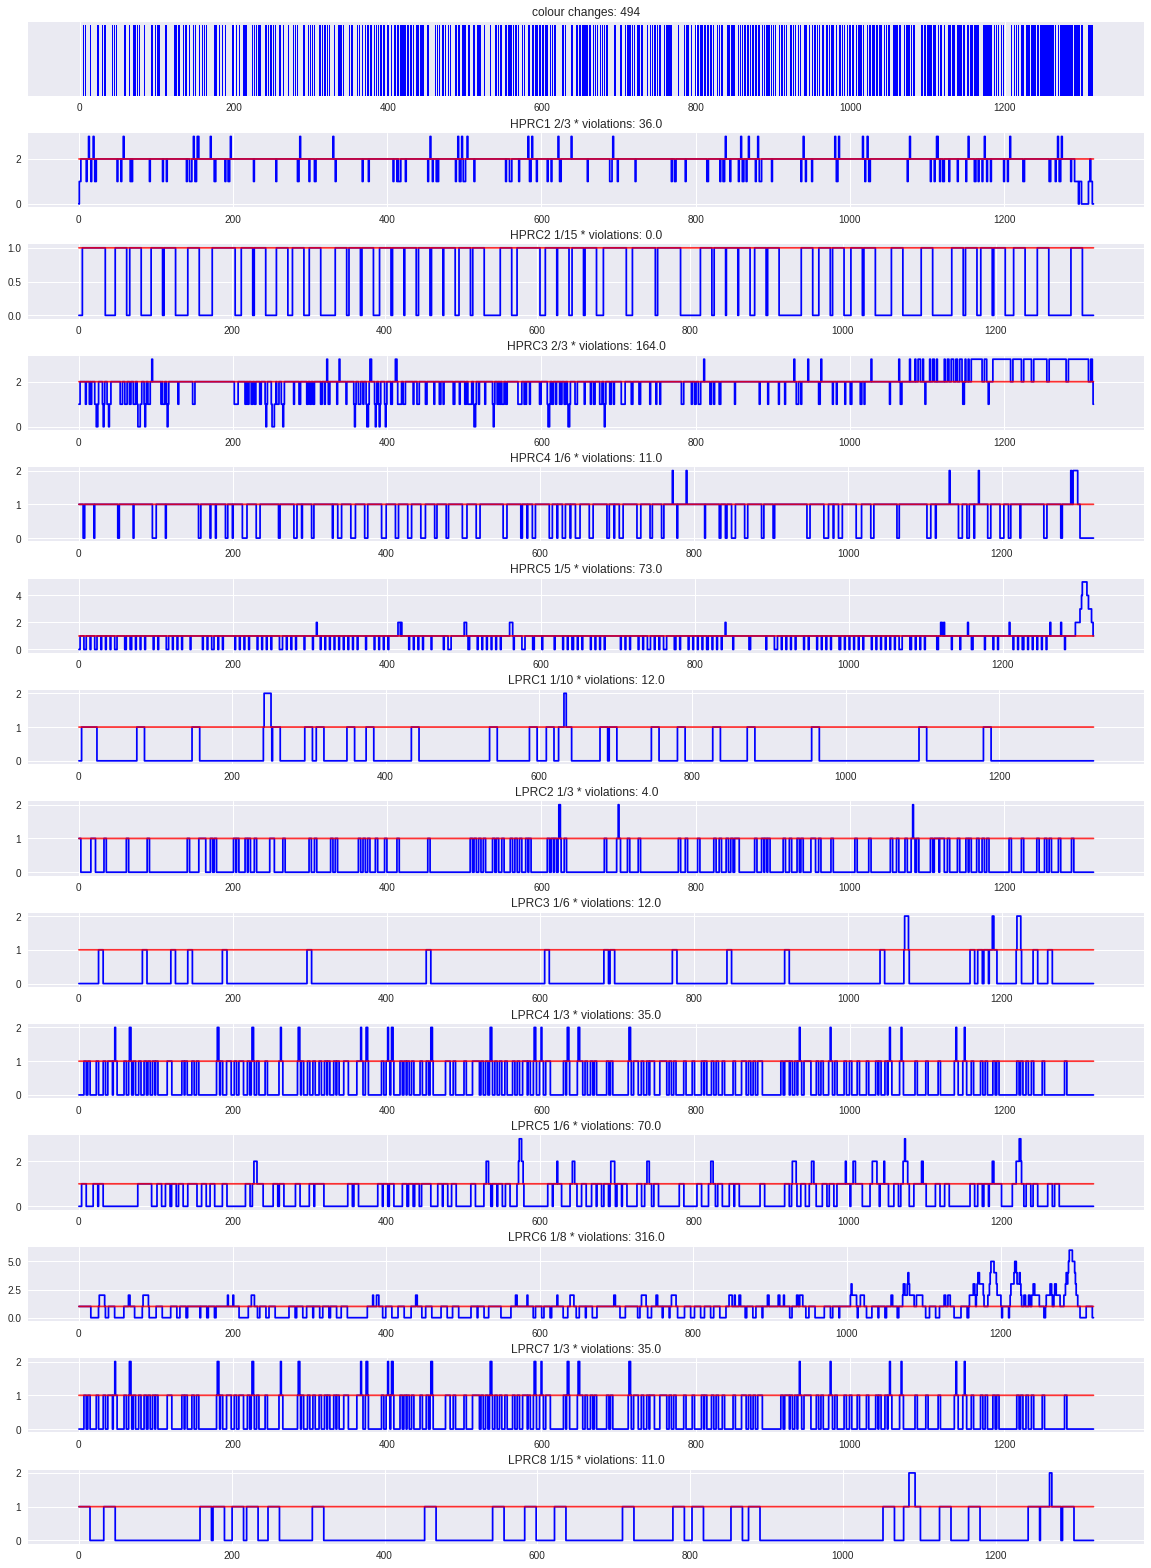

In [7]:
rnlt.plot_options_and_colours(new_schedule,sample_instance)

Wir plotten die laufenden Kosten, um einen Überblick zu erhalten. 

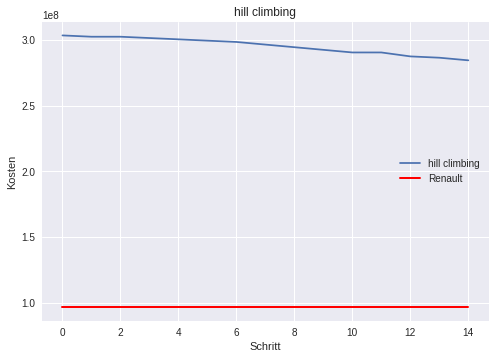

In [8]:
plt.plot(cost_record,label="hill climbing")
plt.xlabel("Schritt")
plt.ylabel("Kosten")
plt.plot([renault_cost]*len(cost_record),"r",linewidth=2,label="Renault")
plt.title("hill climbing")
plt.legend()

Wie viele Verbesserungsversuche hill climbing in jedem Schritt macht, hängt von dem Parameter <code>tries</code> ab. Experimentieren Sie mit dem Parameter und notieren Sie den Effekt auf Qualität der Lösung und Laufzeit. 

In [9]:
### Fügen Sie Ihren Code hier ein ###
start=time.time()
new_schedule,cost,cost_record=hill_climbing(greedy_schedule.copy(),sample_instance,tries=100,record_cost=True)
end=time.time()
hill_cost=rnlt.compute_objective(new_schedule,sample_instance)
print("Kosten hill climbing: {}".format(hill_cost))
print("Kosten Renault      : {}".format(renault_cost))
print("Laufzeit hill climbing: {:.1f}s".format(end-start))
### Ende Einfügung ###

Kosten hill climbing: 265504474.0
Kosten Renault      : 96467092.0
Laufzeit hill climbing: 10.6s


Eine alternative Realisierung von hill climbing geht wie folgt: in jedem Schritt tausche zufällig zwei Autos; wenn dies zu einer Verbesserung führt, akzeptiere den Tausch, sonst tausche zwei andere zufällige Autos usw. Wenn <code>tries</code> viele Versuche scheitern, brich ab. Implementieren Sie und vergleichen Sie! 

Kosten hill climbing: 213569478.0
Kosten Renault      : 96467092.0
Laufzeit hill climbing: 13.8s


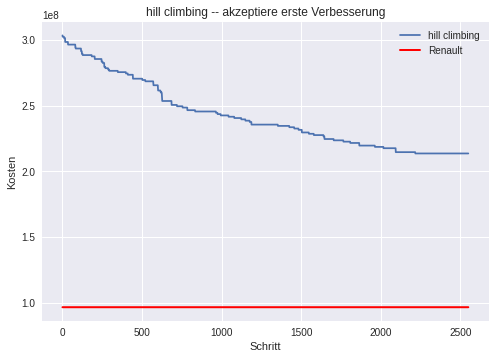

In [10]:
### Fügen Sie Ihren Code hier ein ###
def hill_climbing(schedule,instance,tries=100,record_cost=False):
    current_cost=rnlt.compute_objective(schedule,instance)
    cost_record=[current_cost]
    still_climbing=True
    while still_climbing:
        still_climbing=False
        for _ in range(tries):
            positions=tweak(schedule)
            cost=rnlt.compute_objective(schedule,instance)
            if record_cost:
                cost_record.append(min(current_cost,cost))
            ## wenn Verbesserung, akzeptiere und versuche nächsten Schritt
            if cost<current_cost:
                current_cost=cost
                still_climbing=True
                break ## verlasse for-Schleife
            swap(schedule,positions) ## mache swap rückgängig
    if record_cost:
        return schedule,current_cost,cost_record
    return schedule,current_cost

start=time.time()
new_schedule,cost,cost_record=hill_climbing(greedy_schedule.copy(),sample_instance,tries=200,record_cost=True)
end=time.time()
hill_cost=rnlt.compute_objective(new_schedule,sample_instance)
print("Kosten hill climbing: {}".format(hill_cost))
print("Kosten Renault      : {}".format(renault_cost))
print("Laufzeit hill climbing: {:.1f}s".format(end-start))

plt.plot(cost_record,label="hill climbing")
plt.xlabel("Schritt")
plt.ylabel("Kosten")
plt.plot([renault_cost]*len(cost_record),"r",linewidth=2,label="Renault")
plt.title("hill climbing -- akzeptiere erste Verbesserung")
plt.legend()
### Ende Einfügung ###